In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


Firstly, lets import fastai library.

In [2]:
from fastai.tabular.all import *

Then, lets create a path for our datas and read these .csv files with pandas.

In [3]:
path = Path('/kaggle/input/spaceship-titanic/')

In [4]:
train_df = pd.read_csv(path/'train.csv')
test_df = pd.read_csv(path/'test.csv')
submission = pd.read_csv(path/'sample_submission.csv')

As you can see from above these datas stored in dataframe right now. We need to check what is inside of this data.

In [5]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [6]:
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [7]:
cat_names = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']
cont_names = ['Age', 'RoomService', 'FoodCourt','ShoppingMall','Spa','VRDeck']
procs = [Categorify, FillMissing, Normalize]
y_names = 'Transported'
y_block = CategoryBlock()
train_splits = RandomSplitter()(range_of(train_df))


In [8]:
to = TabularPandas(train_df, procs=procs, cat_names=cat_names, cont_names=cont_names,
                   y_names=y_names, y_block=y_block, splits=train_splits)


In [9]:
dls = to.dataloaders()


In [10]:
learn = tabular_learner(dls,[200,100], metrics=accuracy)

SuggestedLRs(valley=0.0008317637839354575)

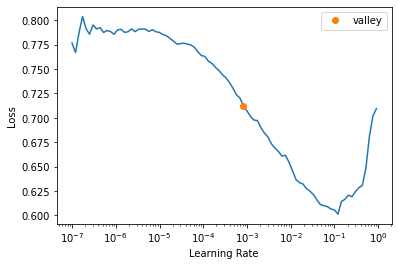

In [11]:
learn.lr_find()

In [12]:
learn.fit_one_cycle(3, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.493633,0.451789,0.782509,00:02
1,0.267653,0.510264,0.765247,00:02
2,0.147965,0.589995,0.766974,00:02


SuggestedLRs(valley=0.004365158267319202)

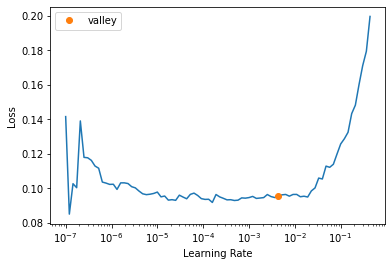

In [13]:
learn.lr_find()

In [14]:
learn.fit_one_cycle(3,3e-5)

epoch,train_loss,valid_loss,accuracy,time
0,0.104624,0.622936,0.761795,00:02
1,0.099866,0.588552,0.770426,00:02
2,0.094914,0.611627,0.770426,00:02


In [15]:
dl = learn.dls.test_dl(test_df, bs=64)
dlp, _  = learn.get_preds(dl=dl)

In [16]:
labels = to_np(np.argmax(dlp, 1))
len(labels)
labels

array([0, 0, 1, ..., 1, 1, 1])

In [17]:
for o in range(len(labels)):
    submission.loc[o,'Transported']='True' if labels[o]==1 else 'False'

submission

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,False
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [18]:
submission.to_csv('submission1.csv',index = False)